In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# 1. Import data
https://www.kaggle.com/competitions/playground-series-s3e7/data?select=train.csv

In [2]:
train_data = pd.read_csv("data/train.csv")
test_data = pd.read_csv("data/test.csv")

In [3]:
train_data.head()

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0,0
1,1,2,0,1,2,0,0,0,117,2018,7,29,0,0,0,0,72.25,0,0
2,2,2,0,0,1,0,0,0,315,2018,12,2,0,0,0,0,52.00,0,0
3,3,1,0,0,2,1,0,0,32,2018,12,1,1,0,0,0,56.00,0,0
4,4,2,0,1,0,0,0,0,258,2018,10,16,0,0,0,0,100.00,0,1


In [4]:
train_data.shape

(42100, 19)

In [5]:
train_data.describe()

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
count,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000
mean,21049.500000,1.920713,0.141093,0.884632,2.398005,0.239192,0.025249,0.428931,103.888029,2017.856295,7.593539,15.902945,0.728504,0.029192,0.019715,0.175772,104.566377,0.571734,0.392019
std,12153.367503,0.524950,0.450128,0.885693,1.427330,0.587674,0.156884,0.832605,81.069343,0.350795,2.829395,8.888582,0.633529,0.168347,0.325837,1.732121,37.139165,0.775041,0.488207
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10524.750000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,37.000000,2018.000000,6.000000,8.000000,0.000000,0.000000,0.000000,0.000000,80.000000,0.000000,0.000000
50%,21049.500000,2.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,93.000000,2018.000000,8.000000,16.000000,1.000000,0.000000,0.000000,0.000000,99.450000,0.000000,0.000000
75%,31574.250000,2.000000,0.000000,2.000000,3.000000,0.000000,0.000000,1.000000,155.000000,2018.000000,10.000000,24.000000,1.000000,0.000000,0.000000,0.000000,123.300000,1.000000,1.000000
max,42099.000000,4.000000,9.000000,7.000000,17.000000,3.000000,1.000000,6.000000,443.000000,2018.000000,12.000000,31.000000,4.000000,1.000000,13.000000,58.000000,540.000000,5.000000,1.000000


In [6]:
train_data.isnull().sum()

id                                      0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42100 entries, 0 to 42099
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id                                    42100 non-null  int64  
 1   no_of_adults                          42100 non-null  int64  
 2   no_of_children                        42100 non-null  int64  
 3   no_of_weekend_nights                  42100 non-null  int64  
 4   no_of_week_nights                     42100 non-null  int64  
 5   type_of_meal_plan                     42100 non-null  int64  
 6   required_car_parking_space            42100 non-null  int64  
 7   room_type_reserved                    42100 non-null  int64  
 8   lead_time                             42100 non-null  int64  
 9   arrival_year                          42100 non-null  int64  
 10  arrival_month                         42100 non-null  int64  
 11  arrival_date   

# 2. EDA

<Axes: >

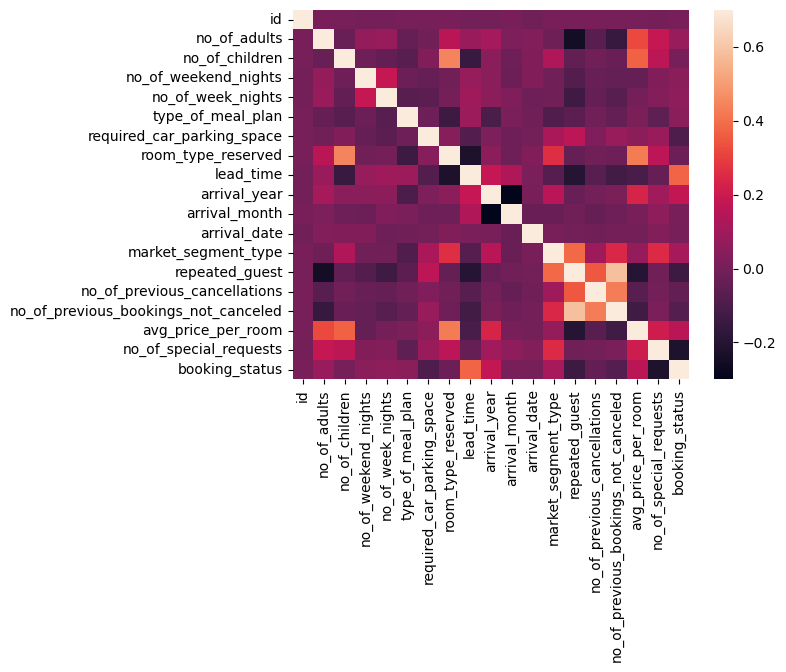

In [8]:
sns.heatmap(train_data.corr(), vmin = -0.3, vmax = 0.7)

In [9]:
train_data.corr()["booking_status"][:-1]

id                                      0.007264
no_of_adults                            0.079760
no_of_children                          0.004260
no_of_weekend_nights                    0.044279
no_of_week_nights                       0.058506
type_of_meal_plan                       0.045980
required_car_parking_space             -0.093262
room_type_reserved                     -0.023087
lead_time                               0.374865
arrival_year                            0.178326
arrival_month                           0.007639
arrival_date                            0.003124
market_segment_type                     0.112648
repeated_guest                         -0.136065
no_of_previous_cancellations           -0.045599
no_of_previous_bookings_not_canceled   -0.080166
avg_price_per_room                      0.157484
no_of_special_requests                 -0.220278
Name: booking_status, dtype: float64

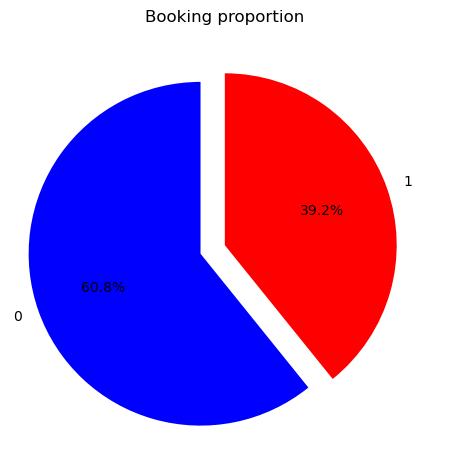

In [10]:
plt.pie(
    [(train_data["booking_status"] == 0).sum(), (train_data["booking_status"] == 1).sum()],
    labels = [0, 1],
    shadow = False,
    colors = ["Blue", "Red"],
    explode = (0.15, 0),
    startangle = 90,
    autopct = '%1.1f%%'
)
#plt.axis("equal")
plt.title("Booking proportion")
plt.tight_layout()
plt.show()

<Axes: >

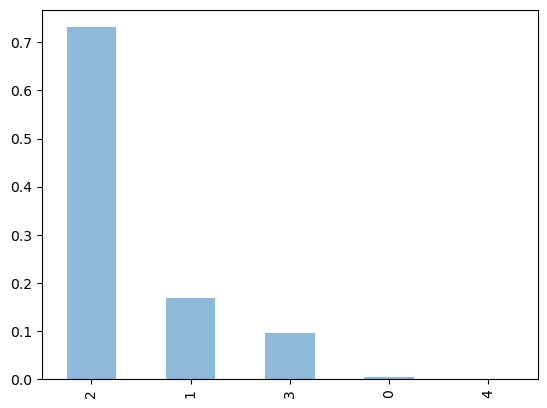

In [11]:
train_data.no_of_adults.value_counts(normalize=True).plot(kind="bar", alpha = 0.5)

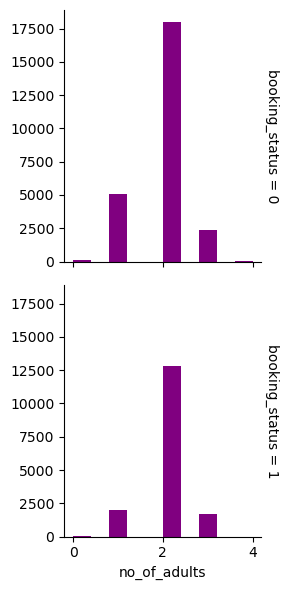

In [12]:
g = sns.FacetGrid(train_data, row="booking_status", margin_titles=True)
g.map(plt.hist, "no_of_adults",color="purple");

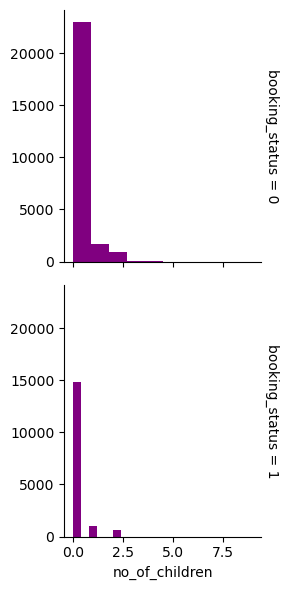

In [13]:
g = sns.FacetGrid(train_data, row="booking_status", margin_titles=True)
g.map(plt.hist, "no_of_children",color="purple");

# Model and Validation

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    train_data.drop("booking_status", axis = 1),
    train_data[["booking_status"]],
    test_size=0.25, random_state=13)

In [15]:
y_train.shape

(31575, 1)

In [16]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [17]:
crossvalidation = KFold(n_splits = 5, shuffle = True, random_state = 1)
for depth in range(1, 20):
    tree_clf = tree.DecisionTreeClassifier(max_depth = depth, random_state = 13)
    if tree_clf.fit(X_train, y_train).tree_.max_depth < depth:
        break
    score = np.mean(cross_val_score(tree_clf, X_train, y_train, scoring = "accuracy", cv = crossvalidation, n_jobs = 1))
    print(depth, score)

1 0.7178463974663499
2 0.7178463974663499
3 0.7613301662707839
4 0.7886935866983373
5 0.7921456848772763
6 0.7925574030087094
7 0.7986064924782265
8 0.7996199524940617
9 0.8022802850356294
10 0.8018685669041965
11 0.7970546318289786
12 0.7926207442596992
13 0.7862549485352336
14 0.7806175771971497
15 0.7748218527315915
16 0.7713380839271575
17 0.7644972288202692
18 0.7581947743467932
19 0.7549960411718131


In [18]:
GBC = GradientBoostingClassifier()

search_grid = {"n_estimators":[800, 900, 1000], "learning_rate":[0.01],
              "max_depth":[7], "subsample":[0.8,0.9], "random_state":[13]}

search = GridSearchCV(estimator = GBC, param_grid = search_grid,
                            scoring = "accuracy", n_jobs = 1,
                            cv = crossvalidation)

"""
GBC = GradientBoostingClassifier()

search_grid = {"n_estimators":[100, 500, 900], "learning_rate":[0.01, 0.001],
              "max_depth":[4,8,12], "subsample":[0.6, 0.8], "random_state":[13]}

search = GridSearchCV(estimator = GBC, param_grid = search_grid,
                            scoring = "accuracy", n_jobs = 1,
                            cv = crossvalidation)
"""

'\nGBC = GradientBoostingClassifier()\n\nsearch_grid = {"n_estimators":[100, 500, 900], "learning_rate":[0.01, 0.001],\n              "max_depth":[4,8,12], "subsample":[0.6, 0.8], "random_state":[13]}\n\nsearch = GridSearchCV(estimator = GBC, param_grid = search_grid,\n                            scoring = "accuracy", n_jobs = 1,\n                            cv = crossvalidation)\n'

In [19]:
search
"""
GBC = GradientBoostingClassifier()

search_grid = {"n_estimators":[100], "learning_rate":[0.01],
              "max_depth":[8], "subsample":[0.8], "random_state":[13]} - 6 iter

search = GridSearchCV(estimator = GBC, param_grid = search_grid,
                            scoring = "accuracy", n_jobs = 1,
                            cv = crossvalidation)
"""

'\nGBC = GradientBoostingClassifier()\n\nsearch_grid = {"n_estimators":[100], "learning_rate":[0.01],\n              "max_depth":[8], "subsample":[0.8], "random_state":[13]} - 6 iter\n\nsearch = GridSearchCV(estimator = GBC, param_grid = search_grid,\n                            scoring = "accuracy", n_jobs = 1,\n                            cv = crossvalidation)\n'

In [20]:
search.fit(X_train, y_train)

C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ra

C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ra

GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             estimator=GradientBoostingClassifier(), n_jobs=1,
             param_grid={'learning_rate': [0.01, 0.001], 'max_depth': [7],
                         'n_estimators': [600, 800], 'random_state': [13],
                         'subsample': [0.6, 0.8]},
             scoring='accuracy')

In [22]:
print(search.best_params_)
print(search.best_score_)

{'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 800, 'random_state': 13, 'subsample': 0.8}
0.818368962787015


In [23]:
predictions = search.predict(X_test)

In [25]:
from sklearn.metrics import accuracy_score

acc_score = accuracy_score(y_test, predictions)

In [26]:
acc_score

0.825748218527316

# Submission